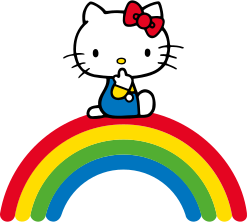

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download shivamb/netflix-shows
!mkdir data
!unzip netflix-shows.zip -d data

  0% 0.00/1.18M [00:00<?, ?B/s]
100% 1.18M/1.18M [00:00<00:00, 79.8MB/s]
Archive:  netflix-shows.zip
  inflating: data/netflix_titles.csv  


In [1]:
import pandas as pd
ns = pd.read_csv('data/netflix_titles.csv')
ns.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [2]:
ns['country'][ns['country'] == 'South Korea'].count()

183

In [3]:
ns['country'][ns['country'].notnull()][~ns['country'].str.contains(',', na=False)].mode().loc[0]

'United States'

In [35]:
!kaggle datasets download rishidamarla/bitcoin-prices-20112015
!unzip bitcoin-prices-20112015.zip -d data

  0% 0.00/40.7k [00:00<?, ?B/s]
100% 40.7k/40.7k [00:00<00:00, 16.1MB/s]
Archive:  bitcoin-prices-20112015.zip
  inflating: data/BitCoin.csv        


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

bitcoin_data = pd.read_csv('data/BitCoin.csv')
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609 entries, 0 to 1608
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1609 non-null   int64  
 1   Date        1609 non-null   object 
 2   Open        1609 non-null   float64
 3   High        1609 non-null   float64
 4   Low         1609 non-null   float64
 5   Close       1609 non-null   float64
 6   Volume      1609 non-null   float64
 7   Market Cap  1609 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 100.7+ KB


In [5]:
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data = bitcoin_data[(datetime.datetime(2016,5,31) < bitcoin_data['Date']) & (bitcoin_data['Date'] < datetime.datetime(2017,7,1))]
bitcoin_data = bitcoin_data.sort_values(by='Date')
bitcoin_data['MA-5'] = bitcoin_data['Open'].rolling(window=5).mean()

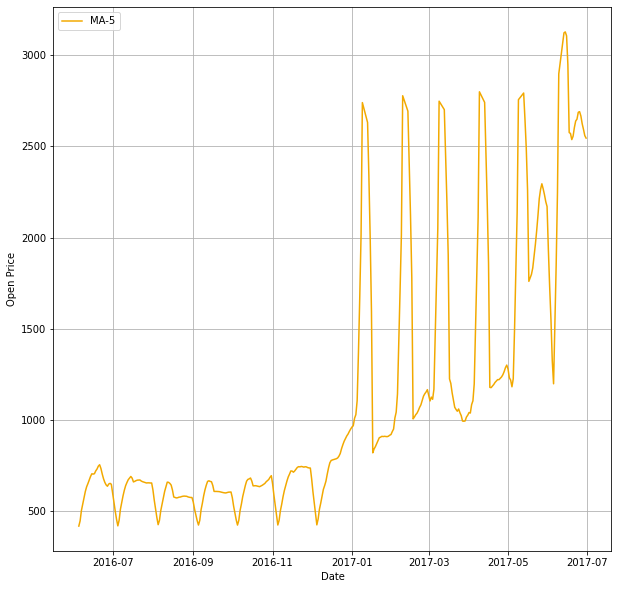

In [6]:
plt.figure(figsize=(10, 10))
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid()
plt.plot(bitcoin_data['Date'], bitcoin_data['MA-5'], label='MA-5', color='#f2a900')
plt.legend(loc="upper left")
plt.show()

In [ ]:
!kaggle datasets download prasoonkottarathil/ethereum-historical-dataset
!unzip ethereum-historical-dataset -d data

ethereum-historical-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ethereum-historical-dataset.zip
replace data/ETH_1H.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
eth_data = pd.read_csv('data/ETH_day.csv')
eth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1438 non-null   object 
 1   Symbol      1438 non-null   object 
 2   Open        1438 non-null   float64
 3   High        1438 non-null   float64
 4   Low         1438 non-null   float64
 5   Close       1438 non-null   float64
 6   Volume ETH  1438 non-null   float64
 7   Volume USD  1438 non-null   float64
dtypes: float64(6), object(2)
memory usage: 90.0+ KB


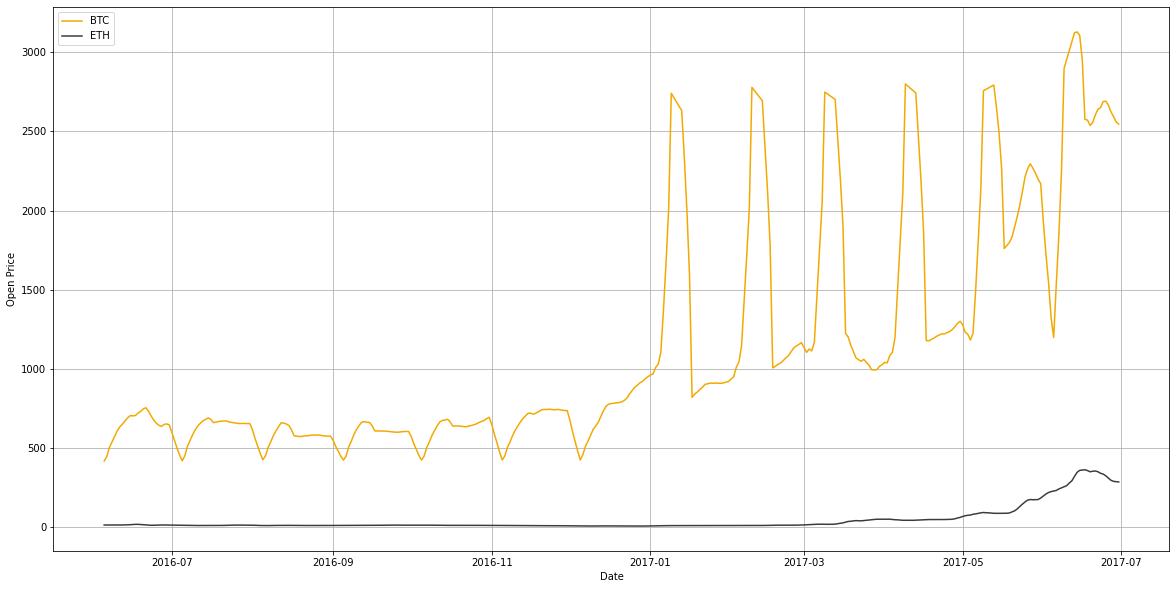

In [8]:
eth_data['Date'] = pd.to_datetime(eth_data['Date'])
eth_data = eth_data[(datetime.datetime(2016,5,31) < eth_data['Date']) & (eth_data['Date'] < datetime.datetime(2017,7,1))]
eth_data = eth_data.sort_values(by='Date')
eth_data['MA-5'] = eth_data['Open'].rolling(window=5).mean()
plt.figure(figsize=(20, 10))
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid()
plt.plot(bitcoin_data['Date'], bitcoin_data['MA-5'], label='BTC', color='#f2a900')
plt.plot(eth_data['Date'], eth_data['MA-5'], label='ETH', color='#3c3c3d')
plt.legend(loc="upper left")
plt.show()